In [1]:
#Importing Libraries We Want to Use
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing Dataset
df = pd.read_csv('/content/marketing_campaign.csv')

In [3]:
#Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#Checking NuLL Values And Dropping Them Off
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [5]:
#But there is some values with incompatible datatype such as:
#Education, which is categorized data, its datatype is object.
#Dt_Customer must be a DateTime field.
#Renaming Columns to Intuitive Names
df = df.rename(columns={
'MntWines': 'Amount_Wines', 
'MntFruits': 'Amount_Fruits',
'MntMeatProducts': 'Amount_Meat',
'MntFishProducts': 'Amount_Fish', 
'MntSweetProducts': 'Amount_Sweet', 
'MntGoldProds': 'Amount_Gold'
})


In [6]:
#Parsing Date of Customer’s Enrollment with the Company (Dt_Customer)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [7]:
#Converting Data Into More Simple CategoriesFor example if we view the Education field values we will view different categories of people that could easily set into 3 main categories:
#Basic and 2n Cycle considered as (Undergraduate) category.Graduation considered as (Graduate) category.Master and PhD considered as (Postgraduate) category.
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [9]:
df["Education"]=df["Education"].map({
"Basic" : "Undergraduate",
"2n Cycle" : "Undergraduate",
"Graduation" : "Graduate",
"Master" : "Postgraduate",
"PhD" : "Postgraduate"
})
df['Education'].value_counts()


Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

In [10]:
#Identifying the Number of Enrolled Days for Each Customer
df['Enrolled_Time'] = '01-01-2015' #assuming we are starting counting from the new year
df['Enrolled_Time'] = pd.to_datetime(df.Enrolled_Time)
df['Enrolled_Days_Amount'] = (df['Enrolled_Time'] - df['Dt_Customer']).dt.days

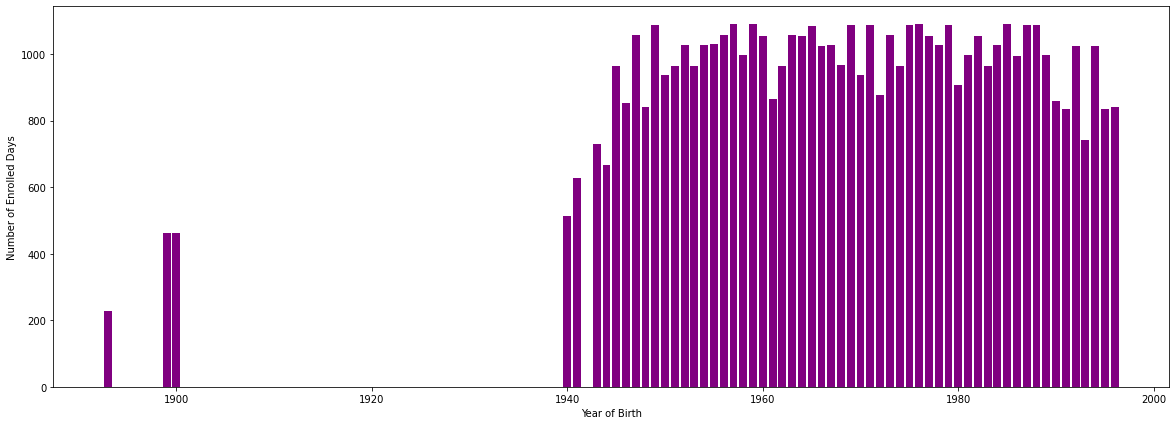

In [11]:
plt.figure(figsize=(20, 7)) #width:20, height:7
plt.bar(df['Year_Birth'], df['Enrolled_Days_Amount'], color ='purple',
        width = 0.8)
plt.xlabel("Year of Birth")
plt.ylabel("Number of Enrolled Days")
plt.show()


In [12]:
#Standardize Data
for i in df.select_dtypes(exclude='object').columns:
    df.loc[:, i] = StandardScaler().fit_transform(np.array(df[[i]]))

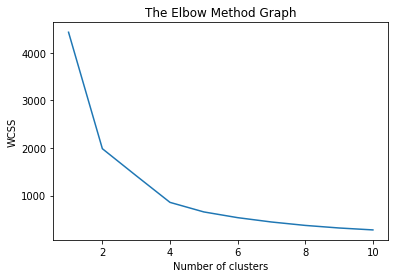

In [13]:
#Data Modeling Into Clusters
#Choosing Number of Clusters
#taking into consideration the (income) and (amount of wine)
X=df.iloc[:, np.array([4, 9])].values
wcss=[]
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )  
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

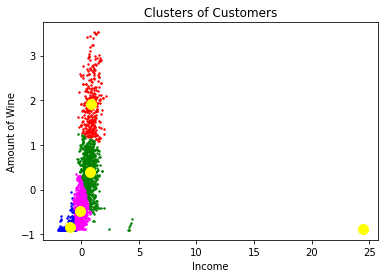

In [17]:
#we will take 5 clusters

kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=2, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=2, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=2, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=2, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=2, c='magenta', label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Income')
plt.ylabel('Amount of Wine')
plt.show()

Yellow dots are the centroids of each cluster
Finally, we can draw a conclusion out of a use case that as the income of customers increases, the spending on wine increases, except some people which are considered here as outliers (for example the person who has an income of 666666) which is considered the higher income among all users and is taking care of his spendings.